In [ ]:
# Dataset: https://www.kaggle.com/radmirzosimov/telecom-users-dataset
# Video source: https://www.youtube.com/watch?v=ehS6tmQveA4
#  Youtube Channel: AIEngineering, In that video, Saishruthi Swaminathan walked us through the lifecycle of a machine learning workflow 

In [5]:
# importing required plotly==4.14.3
!pip install plotly==4.14.3

# why '!' before pip?
# This is actually not specific to pip, but really any shell command from the iPython notebook
# eg: !pwd
# reference: https://stackoverflow.com/questions/41510454/why-does-pip-need-an-exclamation-point-to-use-in-ipython

In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

**Importing data from local storage**

In [ ]:
# reading file from local machine
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
df_data = pd.read_csv(io.BytesIO(uploaded['telecom_users.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df_data.head()

NameError: ignored

**Importing data from google drive**

In [3]:
# another try to read from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = "/content/drive/MyDrive/Colab_Notebooks/telecom_users.csv"
df_data = pd.read_csv(path)
# Dataset is now stored in a Pandas Dataframe
df_data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


# EXPLORATORY DATA ANALYSIS

---



In [ ]:
# About the Data Set:

# We are provided with a dataset from a telecommunications company. 
# The data contains information about almost six thousand users, their demographic characteristics, 
# the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.

# The task is to analyze the data and predict the churn of users (to identify people who will and will not renew their contract). 
# The work should include the following mandatory items:
# 1. Description of the data (with the calculation of basic statistics);
# 2. Research of dependencies and formulation of hypotheses;
# 3. Building models for predicting the outflow (with justification for the choice of a particular model) based on tested hypotheses and 
# identified relationships;


In [ ]:
# About this features available:
  # 1.customerID - customer id
  # 2. gender - client gender (male / female)
  # 3. SeniorCitizen - is the client retired (1, 0)
  # 4. Partner - is the client married (Yes, No)
  # 5. tenure - how many months a person has been a client of the company
  # 6. PhoneService - is the telephone service connected (Yes, No)
  # 7. MultipleLines - are multiple phone lines connected (Yes, No, No phone service)
  # 8. InternetService - client's Internet service provider (DSL, Fiber optic, No)
  # 9. OnlineSecurity - is the online security service connected (Yes, No, No internet service)
  # 10. OnlineBackup - is the online backup service activated (Yes, No, No internet service)
  # 11. DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)
  # 12. TechSupport - is the technical support service connected (Yes, No, No internet service)
  # 13. StreamingTV - is the streaming TV service connected (Yes, No, No internet service)
  # 14. StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
  # 15. Contract - type of customer contract (Month-to-month, One year, Two year)
  # 16. PaperlessBilling - whether the client uses paperless billing (Yes, No)
  # 17. PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
  # 18. MonthlyCharges - current monthly payment
  # 19. TotalCharges - the total amount that the client paid for the services for the entire time
  # 20.** Churn - whether there was a churn (Yes or No)

In [7]:
# Remove ids from the analysis
df_data = df_data.drop(columns=['Unnamed: 0', 'customerID'])

In [8]:
df_data.shape

(5986, 20)

In [9]:
# let us check the data type for each feature
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


We can see that variable 'TotalCharges' instead of being a float64 datatype is of type object. Needs further investigation!!

In [10]:
df_data['TotalCharges'].value_counts()

# Observation: There is one ' ' blank value, which has occurred 10 times; making the data type as object instead of float64

20.2       10
           10
19.75       8
19.55       7
19.9        6
           ..
4639.45     1
179.35      1
890.6       1
2727.3      1
387.4       1
Name: TotalCharges, Length: 5611, dtype: int64

In [ ]:
sorted(df_data['TotalCharges'].unique().tolist())
# using this we actually obtained the ' ' empty value; how it actually looks

In [12]:
# We will replace the 10 blank places with 0.0 here
print("Before removing blank values")
print(df_data[df_data['TotalCharges'] == ' '].index) # to print those index values where variable 'TotalCharges == ' '

df_data['TotalCharges'] = df_data.TotalCharges.replace(r'^\s*$', 0.0, regex=True) # to replace white spaces (any number of times and then ending with white space) with 0.0

print("After removing full blank values")
print(df_data[df_data['TotalCharges'] == ' '].index)

Before removing blank values
Int64Index([356, 634, 2771, 3086, 3255, 4326, 5375, 5382, 5695, 5951], dtype='int64')
After removing full blank values
Int64Index([], dtype='int64')


In [ ]:
# we need to change the data type of variable 'Totalcharges' to float64
df_data.info() # still object
df_data['TotalCharges'] = df_data['TotalCharges'].astype(float)
df_data.info() # yes now it has changed to float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


In [13]:
df_data.SeniorCitizen.value_counts()

0    5020
1     966
Name: SeniorCitizen, dtype: int64

In [14]:
df_data['gender'].value_counts()

Male      3050
Female    2936
Name: gender, dtype: int64

Business Problem to Data Science Questions:
---

The client was expecting to analyse the current data to understand what went wrong. So the business team, say, came up with couple of questions as below:

N.B: questions keep updating from time to time
1. How gender, partner, and dependents are related to churn?
2. Are we facing churn with customers with longer tenure?
3. Are we having issues with phone and internet services?
4. Does customers opted for tech support stayed for longer tenure with less churn?
5. Did customers monthly charge and total charge relate with churn?
6. Do customers opted for streaming face issue with the service?
7. Which contract do customers prefer in order to stay with the business?

# Data Visualization: 
Using Plotly and Seaborn.

# Q-1: How gender, partner, and dependents are related to churn?

In [15]:
# The count for each categories in this path
df_data.groupby(['gender', 'Partner', 'Dependents', 'Churn']).size()

gender  Partner  Dependents  Churn
Female  No       No          No       889
                             Yes      486
                 Yes         No        96
                             Yes       29
        Yes      No          No       531
                             Yes      164
                 Yes         No       629
                             Yes      112
Male    No       No          No       941
                             Yes      459
                 Yes         No       145
                             Yes       37
        Yes      No          No       528
                             Yes      197
                 Yes         No       640
                             Yes      103
dtype: int64

In [16]:
# instead of keeping multi index, or merged data, we changed it to row-wise data
df_data.groupby(['gender', 'Partner', 'Dependents', 'Churn']).size().reset_index(name='count')

,gender,Partner,Dependents,Churn,count
0,Female,No,No,No,889
1,Female,No,No,Yes,486
2,Female,No,Yes,No,96
3,Female,No,Yes,Yes,29
4,Female,Yes,No,No,531
5,Female,Yes,No,Yes,164
6,Female,Yes,Yes,No,629
7,Female,Yes,Yes,Yes,112
8,Male,No,No,No,941
9,Male,No,No,Yes,459


In [ ]:
# visualizing the above info using plotly
# Treemap charts visualize hierarchical data using nested rectangles
# all the features here are categorical in nature
fig = px.treemap(df_data.groupby(['gender', 'Partner', 'Dependents', 'Churn']).size().reset_index(name='count'), 
                 path=['gender', 'Partner', 'Dependents', 'Churn'], values='count', color='Churn', 
                 title='How gender, partner, and dependents are related to churn?')

fig.show()

# Q-2: Are we facing churn with customers with longer tenure?

In [17]:
df_data.groupby(['tenure', 'Churn']).size().reset_index(name='count')
# The data is not categorical, thus has high number of rows

,tenure,Churn,count
0,0,No,10
1,1,No,192
2,1,Yes,318
3,2,No,90
4,2,Yes,104
...,...,...,...
140,70,Yes,10
141,71,No,147
142,71,Yes,5
143,72,No,304


In [ ]:
# Here, reset_index is from pandas.Series.reset_index
# A rug plot is a plot of data for a single quantitative variable, displayed as marks along an axis. It is used to visualise the distribution of the data
# A marginal distribution is the percentages out of totals

fig = px.histogram(df_data.groupby(['tenure', 'Churn']).size().reset_index(name='count'), 
                   x="tenure", y="count", color="Churn", marginal="rug", color_discrete_map={"Yes":"#E45756", "No":"#1CBE4F"}, 
                   title="Are we facing churn with customers with longer tenure?")

fig.show()

# Observation: customers with low tenure (0-10) has the highest rate of churning

# Are we having issues with phone and internet services?

In [ ]:
df_data.groupby(['Churn', 'PhoneService', 'InternetService']).size()

Churn  PhoneService  InternetService
No     No            DSL                 441
       Yes           DSL                1230
                     Fiber optic        1536
                     No                 1192
Yes    No            DSL                 149
       Yes           DSL                 248
                     Fiber optic        1091
                     No                   99
dtype: int64

In [ ]:
# Sunburst plots visualize hierarchical data spanning outwards radially from root to leaves
# The root starts from the center and children are added to the outer rings.
fig = px.sunburst(df_data.groupby(['Churn', 'PhoneService', 'InternetService']).size().reset_index(name='count'), 
                            path=['Churn', 'PhoneService', 'InternetService'], values='count', 
                            title='Are we having issues with phone and internet services?')

fig.show()

# it is observed that people with 'Fiber Optic' internet service with phone service are churning more

# Does customers opted for tech support stayed for longer tenure with less churn?

In [18]:
# dividing data frame into 2 different dataframes, Tech-support, no Tech-support
df_tech_yes = df_data[df_data['TechSupport'] == 'Yes']
df_tech_no = df_data[df_data['TechSupport'] == 'No']

# Customers getting tech support

In [ ]:
# for each tenure, whether Churned or not, and its corresponding count
df_tech_yes.groupby(['tenure', 'Churn']).size()

tenure  Churn
0       No         3
1       No        16
        Yes       12
2       No         5
        Yes       10
                ... 
70      Yes        7
71      No        79
        Yes        2
72      No       188
        Yes        2
Length: 141, dtype: int64

In [ ]:
fig = px.histogram(df_tech_yes.groupby(['tenure', 'Churn']).size().reset_index(name='count'), 
                   x="tenure", y="count", marginal="rug", color="Churn", color_discrete_map={"Yes":"#E45756", "No":"#1CBE4F"}, 
                   title="Statistics of customers opted for tech support with churning")
# color="Churn" is vvi to mention, or else it will color 'count'
fig.show()

# Observation: more churning takes place in first 10 yrs, for customers with tech support

# Customers who didn't took tech support

In [19]:
# for each tenure, whether Churned or not, and its corresponding count
df_tech_no.groupby(['tenure', 'Churn']).size()

tenure  Churn
0       No         1
1       No        92
        Yes      258
2       No        53
        Yes       89
                ... 
70      Yes        3
71      No        30
        Yes        3
72      No        59
        Yes        2
Length: 145, dtype: int64

In [ ]:
# plotting histogram for customer churning who took no tech support
fig = px.histogram(df_tech_no.groupby(['tenure', 'Churn']).size().reset_index(name='count'),
                   x='tenure', y='count',color='Churn', marginal='rug', color_discrete_map={"Yes":"#E45756", "No":"#1CBE4F"}, 
                   title="Statistics of customers opted for tech support with churning")

fig.show()

# churning is more in 0-10 years for customers who didn't opted for technical support

In [ ]:
fig = px.sunburst(df_data.groupby(['Churn', 'TechSupport', 'tenure']).size().reset_index(name='count'), 
                            path=['Churn', 'TechSupport', 'tenure'], values='count', 
                            title='Does customers opted for tech support stayed for longer tenure with less churn?')

fig.show()

# Observations: churning is more where there is no tech support, and a lot for initial years of tenure (1,2,..)

# Did customers' monthly charges and total charges relate with churn?

In [ ]:
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, 
# analagous to a histogram. 
# KDE represents the data using a continuous probability density curve in one or more dimensions.

[Text(0.5, 1.0, 'Did customers monthly charges relate with churn?')]

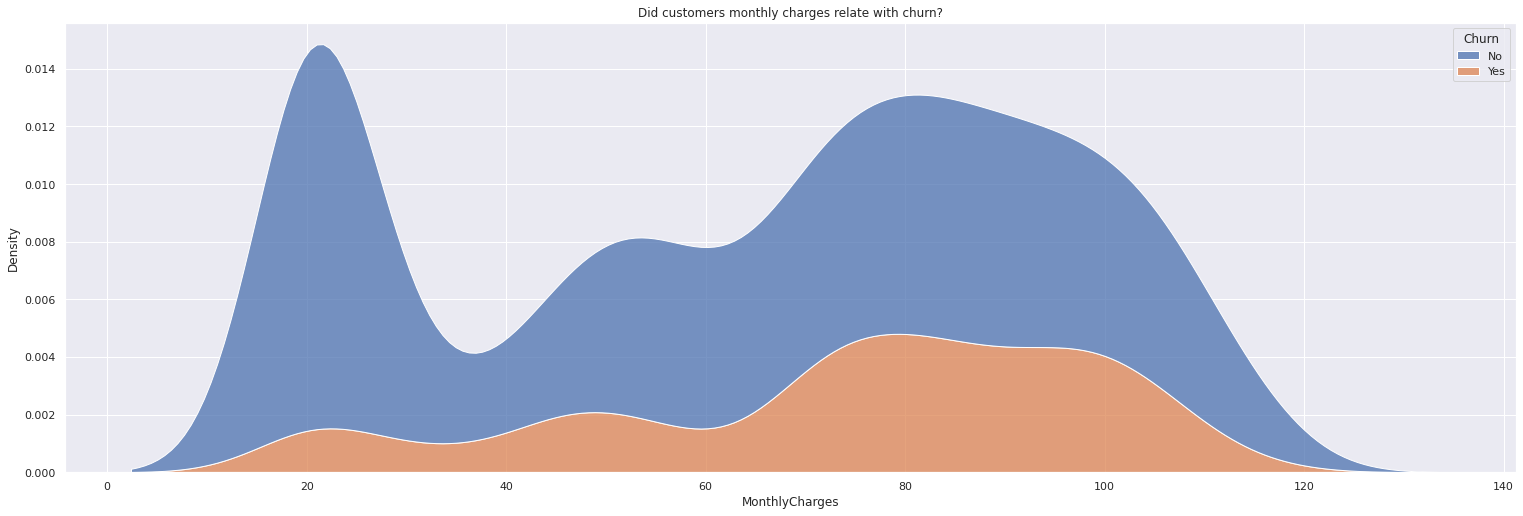

In [ ]:
# graphically understanding it with kdeplot from sns

sns.set(rc={'figure.figsize':(26,8.27)}) #rc - seems row, column
sns.kdeplot(data=df_data, x="MonthlyCharges", hue="Churn", multiple="stack").set(title="Did customers monthly charges relate with churn?")

# Observations: As the monthy charges are incresing, we can see the density increasing too (60-120), so more churning

[Text(0.5, 1.0, 'Did customers total charges relate with churn?')]

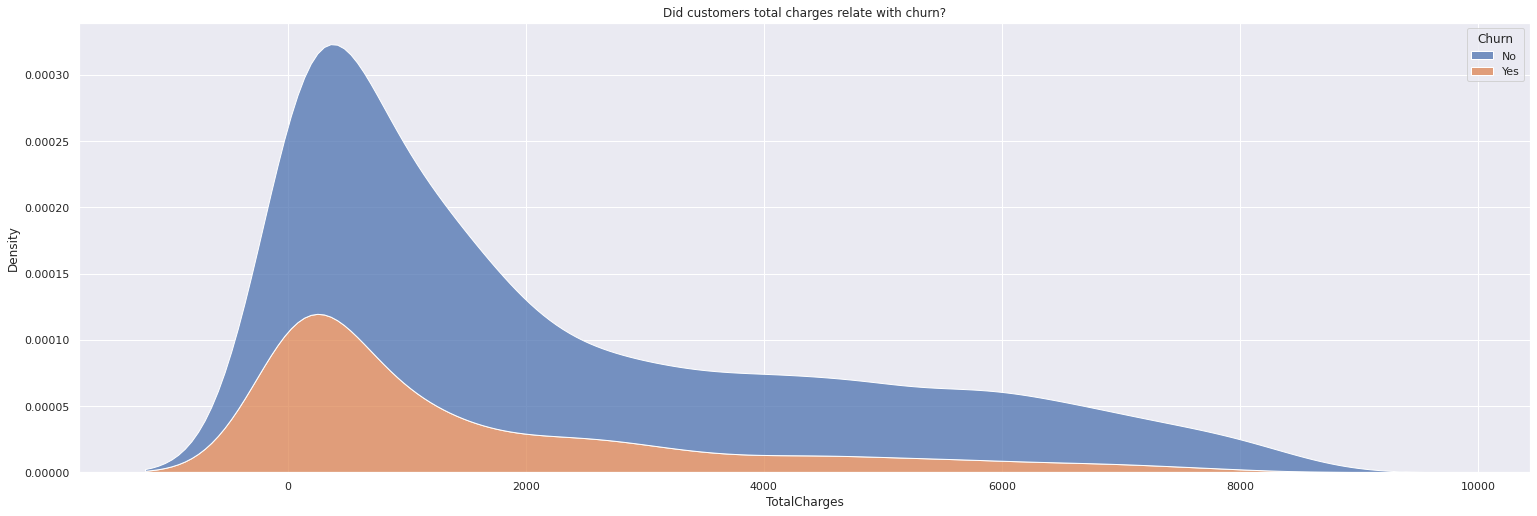

In [ ]:
# graphically understanding the relationship of total charges with churn

sns.set(rc={'figure.figsize':(26,8.27)})
sns.kdeplot(data=df_data, x="TotalCharges", hue="Churn", multiple="stack").set(title="Did customers total charges relate with churn?")

# It seems 0-2000 total charges have maximum churning

# Do customers opted for streaming, faced issue with the service?

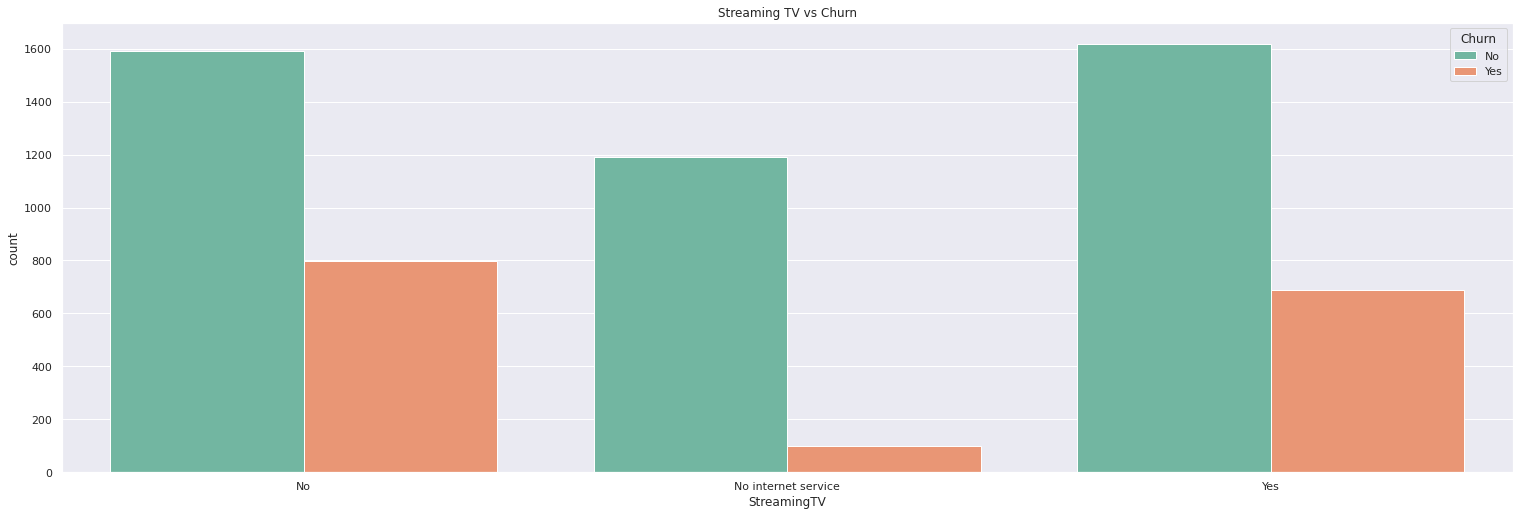

In [ ]:
# plotting Streaming TV count vs Churn
ax = sns.barplot(x="StreamingTV", y="count", hue="Churn",
    data=df_data.groupby(['Churn', 'StreamingTV']).size().reset_index(name='count'), palette="Set2").set(title="Streaming TV vs Churn")

# More churning is being observed for the 'Yes', 'No' group of StreamingTv

In [ ]:
fig = px.sunburst(df_data.groupby(['Churn', 'StreamingTV']).size().reset_index(name='count'), 
                            path=['Churn', 'StreamingTV'], values='count', 
                            title='Do customers opted for streaming, faced issue with the service?')

fig.show()

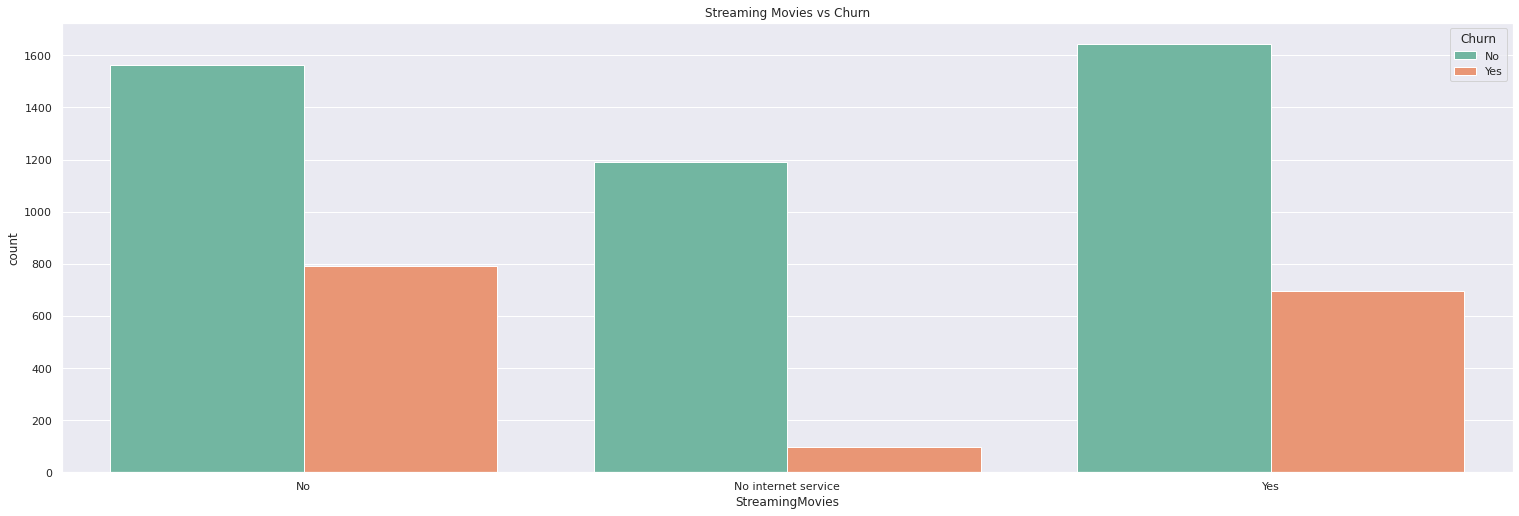

In [ ]:
# plotting Streaming movies count vs Churn
ax = sns.barplot(x="StreamingMovies", y="count", hue="Churn",
        data=df_data.groupby(['Churn', 'StreamingMovies']).size().reset_index(name="count"), palette="Set2").set(title="Streaming Movies vs Churn")

# More churning observed for both 'No' and 'Yes', participants of Streaming Movies

# Which contract do customers prefer in order to stay with the business?

In [20]:
df_data.groupby(['Contract', 'Churn']).size().reset_index(name='count')
# seems Month-to-Month contract has a lot of churning (Yes)

,Contract,Churn,count
0,Month-to-month,No,1871
1,Month-to-month,Yes,1398
2,One year,No,1128
3,One year,Yes,148
4,Two year,No,1400
5,Two year,Yes,41


In [ ]:
# plotting graph to get better understanding
fig = px.sunburst(df_data.groupby(['Contract', 'Churn']).size().reset_index(name='count'), 
                  path=['Contract', 'Churn'], values='count', 
                  title='Which contract do customers prefer in order to stay with the business?')

fig.show()

# clearly visible that month-to-month has the highest Churning

# Data Pre-processing

---



In [22]:
# List of categorical columns
cat_cols = [col for col in df_data.columns if df_data[col].dtype == 'object'] + ['SeniorCitizen'] 
#senior citizen is numerical but the 0,1 can give the algorithm false assumption that 1 is more impt than 0 or vice versa

cat_cols.remove('Churn') #as this need to be label encoded
print(cat_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'SeniorCitizen']


In [23]:
# get_dummies does one-hot encoding
df_processed = pd.get_dummies(df_data, prefix_sep="_", columns=cat_cols)

In [24]:
df_processed.info()
# data type changed to 'uint8'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Columns: 5657 entries, tenure to SeniorCitizen_1
dtypes: float64(1), int64(1), object(1), uint8(5654)
memory usage: 32.4+ MB


In [25]:
df_processed.head()
# print(len(df_processed.columns.tolist())): 50

,tenure,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,...,TotalCharges_97,TotalCharges_97.1,TotalCharges_97.5,TotalCharges_970.4,TotalCharges_970.55,TotalCharges_971.3,TotalCharges_973.1,TotalCharges_973.25,TotalCharges_973.55,TotalCharges_973.65,TotalCharges_978.6,TotalCharges_979.05,TotalCharges_979.5,TotalCharges_98.35,TotalCharges_98.5,TotalCharges_980.35,TotalCharges_981.45,TotalCharges_985.05,TotalCharges_987.95,TotalCharges_989.05,TotalCharges_989.45,TotalCharges_99.6,TotalCharges_99.75,TotalCharges_99.95,TotalCharges_990.3,TotalCharges_990.45,TotalCharges_990.85,TotalCharges_990.9,TotalCharges_992.7,TotalCharges_994.55,TotalCharges_994.8,TotalCharges_995.35,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,SeniorCitizen_0,SeniorCitizen_1
0,72,24.10,No,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,44,88.15,No,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,38,74.95,Yes,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,55.90,No,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,53.45,No,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [26]:
# Label encoding the target column
print("Before encoding: ", df_processed['Churn'].unique())

df_processed['Churn'] = np.where(df_processed['Churn'].str.contains("Yes"), 1, 0)

print("After encoding: ", df_processed['Churn'].unique())

Before encoding:  ['No' 'Yes']
After encoding:  [0 1]


# we are saving the data transformation we did in order to perform the same operation in the test dataset,

In [27]:
# catagorical col names; those which have been transformed
cat_dummies = [col for col in df_processed if "_" in col and col.split("_")[0] in cat_cols]

# saving the name of one hot encoded cols columns
with open('/content/drive/MyDrive/Colab_Notebooks/cat_dummies.txt','w') as filehandle:
    for listitem in cat_dummies:
        filehandle.write('%s\n'%listitem)


# saving the cols that we selected
processed_cols = list(df_processed.columns[:])
with open('/content/drive/MyDrive/Colab_Notebooks/processed_cols.txt','w') as filehandle:
    for listitem in processed_cols:
        filehandle.write('%s\n'%listitem)

In [28]:
# let's see if there is imbalance in data
df_processed.Churn.value_counts()

# clearly, 0 or non-churned customer data is more

0    4399
1    1587
Name: Churn, dtype: int64

# Choosing algorithms: parameters and handling imbalance
- Explainability (explaining model mathametically)
- Memory: can we load the data fully? do we need incremental learning algorithms?
- Number of features
- Nonlinearity of the data
- Training speed
- Prediction speed

# Methods we can use to deal with data imbalance?
- Choosing a learning algorithm that provide weights for every class
- Data-level approach: 
    - Under-sampling, 
    - over-sampling
    - Cluster-based over sampling
    - Synthetic minority over-sampling technique(SMOTE)
- Algorithm ensemble techniques
    - Bagging techniques: (random number features and training examples selected from total features, called bags. This random selection is with replacement one)
      - Random Forest
    - Boosting:
        - Ada boost
        - Gradient Tree boosing 
        - XGBoost 

# Here we will use ensemble technique
- Ada Boost classifier:
    - Ada Boost is the first original boosting technique which creates a highly accurate prediction rule by combining many weak and inaccurate rules.

    Each classifier is serially trained with the goal of correctly classifying examples in every round that were incorrectly classified in the previous round.

    In each iteration (except first, where each training e.g. is given equal weight), the mis-classified e.g. from previous iterations are given more weight.

In [29]:
# getting all the non-target features
feature_df = df_processed.drop(['Churn'], axis=1)

# extracting target column
target_df = df_processed[['Churn']] # will extract in df form

# splitting into train-test set
# processed data being used to train and testing
x_train, x_test, y_train, y_test = train_test_split(feature_df, target_df, test_size=0.2, random_state=0)



# Initializing adaboost classifier
ada_cls = AdaBoostClassifier(n_estimators=100) #base_classifier: DecisionTreeClassifier



# fitting the model
ada_cls.fit(x_train, y_train)

# predicting results; 
# choosing metrics correctly is very important in case of unbalanced data

print("Accuracy: ", metrics.accuracy_score(y_test, ada_cls.predict(x_test)))

print("Recall Score: ", metrics.recall_score(y_test, ada_cls.predict(x_test), average='weighted'))

print("Precision Score: ", metrics.precision_score(y_test, ada_cls.predict(x_test), average='weighted'))

print("F1 score: ", metrics.f1_score(y_test, ada_cls.predict(x_test), average='weighted'))

print("Confusion matrix: ", metrics.confusion_matrix(y_test, ada_cls.predict(x_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.8046744574290484
Recall Score:  0.8046744574290484
Precision Score:  0.795394440800165
F1 score:  0.7976032381557125
Confusion matrix:  [[796  87]
 [147 168]]


In [ ]:
# The various types of 'average' that we can set for precision, recall and F1 scores

# average{‘micro’, ‘macro’, ‘samples’,’weighted’, ‘binary’} or None, default=’binary’
# This parameter is required for multiclass/multilabel targets. If None, the scores for each class are returned. 
# Otherwise, this determines the type of averaging performed on the data:

# 'binary':
# Only report results for the class specified by pos_label. This is applicable only if targets (y_{true,pred}) are binary.

# 'micro':
# Calculate metrics globally by counting the total true positives, false negatives and false positives. Takes label imbalance into account

# 'macro':
# Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

# 'weighted':
# Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). 
# This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

# 'samples':
# Calculate metrics for each instance, and find their average (only meaningful for multilabel classification where this differs from accuracy_score).

In [31]:
# saving the model as pickle. Now the target is deployment

import pickle
# saving the classifier
with open('/content/drive/MyDrive/Colab_Notebooks/classifier.pkl', 'wb') as fid: #'wb' - stands for write in binary
  pickle.dump(ada_cls, fid)

In [ ]:
# Now the deployment